In [9]:
import os
import wave
import pickle
import pyaudio
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn import preprocessing
from scipy.io.wavfile import read
import python_speech_features as mfcc
from sklearn.mixture import GaussianMixture 

warnings.filterwarnings("ignore")


In [10]:
# function to calculate delta array
def calculate_delta(array):
   
    rows,cols = array.shape
    deltas = np.zeros((rows,20))
    N = 2
    for i in range(rows):
        index = []
        j = 1
        while j <= N:
            if i-j < 0:
              first =0
            else:
              first = i-j
            if i+j > rows-1:
                second = rows-1
            else:
                second = i+j 
            index.append((second,first))
            j+=1
        deltas[i] = ( array[index[0][0]]-array[index[0][1]] + (2 * (array[index[1][0]]-array[index[1][1]])) ) / 10
    return deltas

# extracting mfcc features and combining it with deltas
def extract_features(audio,rate):
       
    mfcc_feature = mfcc.mfcc(audio,rate, 0.025, 0.01,20,nfft = 1200, appendEnergy = True)    
    mfcc_feature = preprocessing.scale(mfcc_feature)
    print(mfcc_feature)
    print(mfcc_feature.shape)
    delta = calculate_delta(mfcc_feature)
    com = np.hstack((mfcc_feature,delta)) 
    return com

[[-3.82914088 -2.41986463 -2.20683511 ...  0.09656615 -0.21606281
  -0.40993947]
 [-3.81354814 -2.04565161 -1.58473824 ...  0.25675696 -0.01442801
   0.13645863]
 [-3.80794676 -2.12733059 -1.70532491 ...  0.43514431 -0.20713431
  -0.11135106]
 ...
 [-0.41049267 -0.4440455  -0.23813333 ... -0.6382829  -0.33836876
  -0.18104024]
 [-0.48546931 -0.29511306 -0.46965316 ... -0.35511683  0.4695996
   1.03647441]
 [-0.70166441 -0.11212875 -0.37515706 ... -0.10935643  0.77715419
   2.01425635]]
(999, 20)
[[-3.76865069 -2.44412858 -2.16701363 ... -0.4047867  -0.52115639
  -0.67672967]
 [-3.75518639 -2.06141926 -1.62608988 ... -0.23056712 -0.28901246
  -0.20936852]
 [-3.75034961 -2.14495271 -1.73094203 ... -0.03655745 -0.51087693
  -0.42133234]
 ...
 [-0.84938992  0.60992186 -0.27226114 ...  0.02136854  0.64728332
   0.33192621]
 [-0.81850651  0.5745689   0.00709023 ...  0.18298865  0.30491642
  -0.18826878]
 [-0.95312993  0.56019003  0.18207968 ...  0.11635177  0.1701885
   0.29174463]]
(999, 20

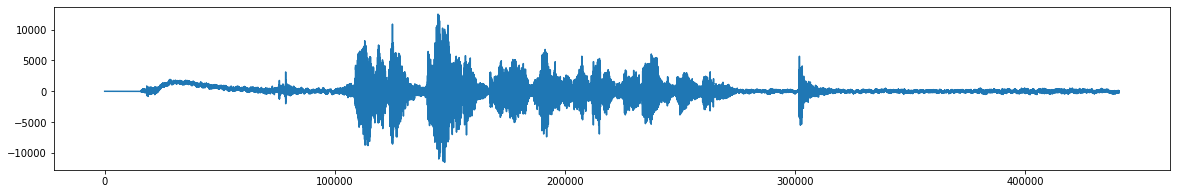

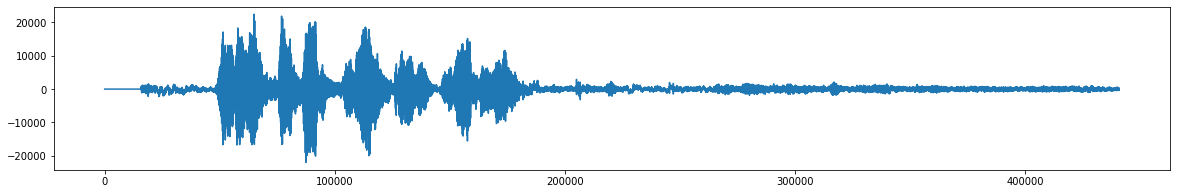

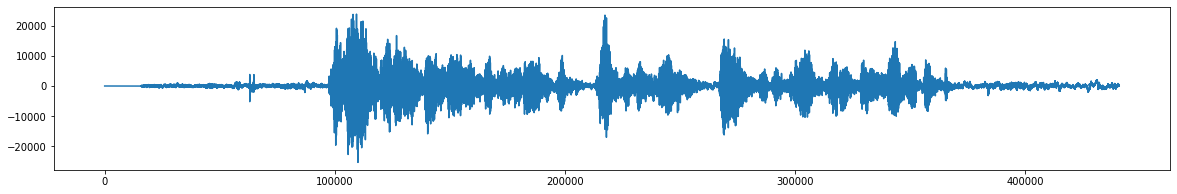

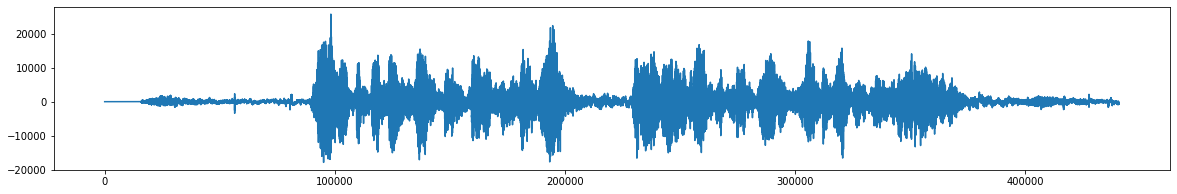

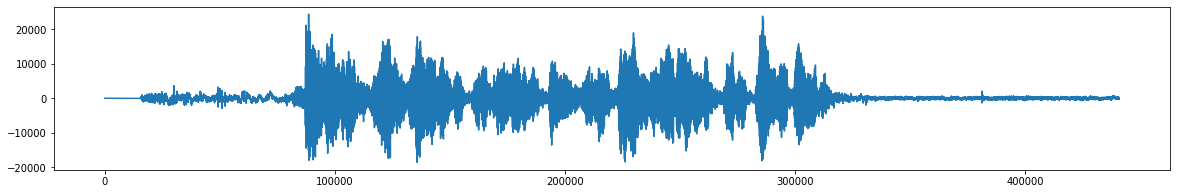

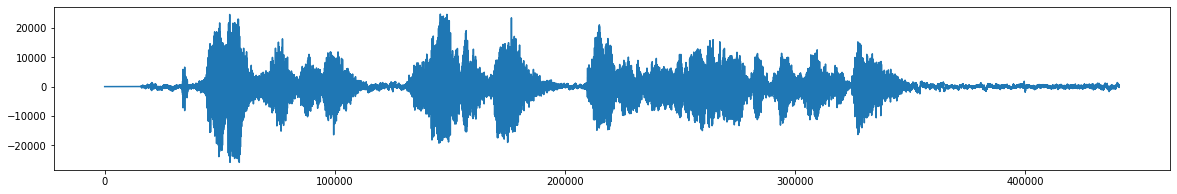

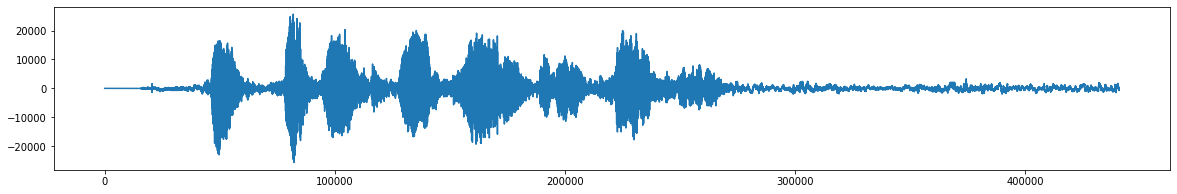

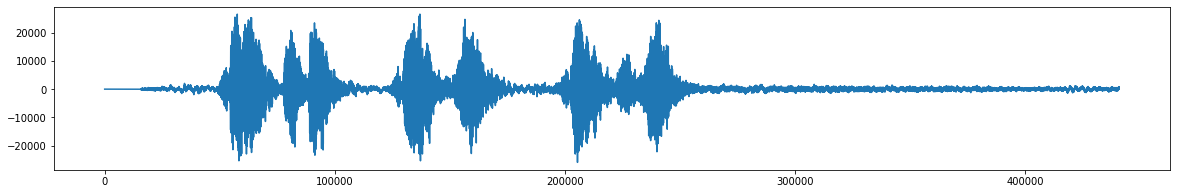

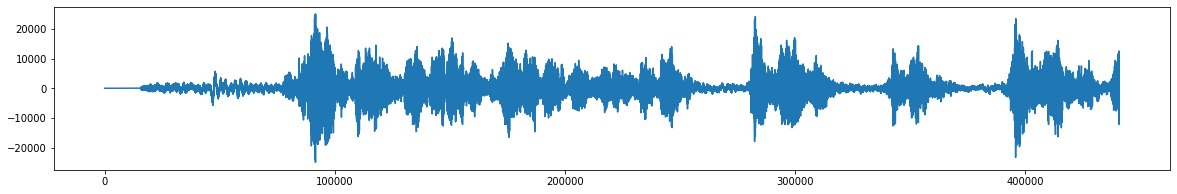

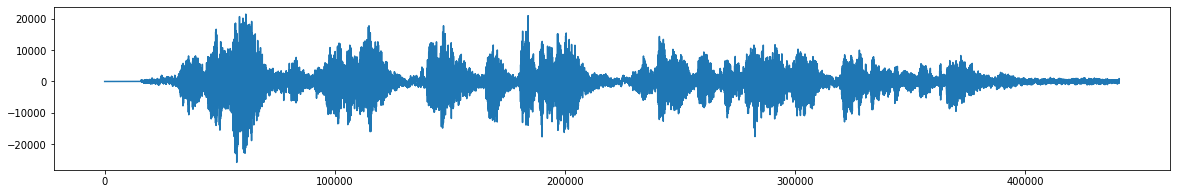

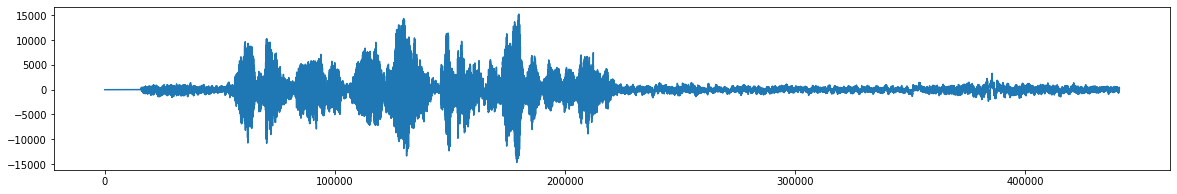

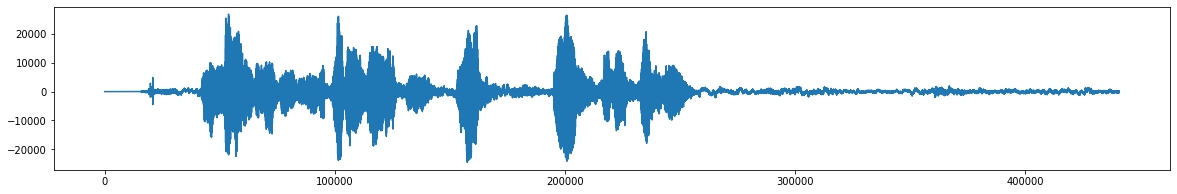

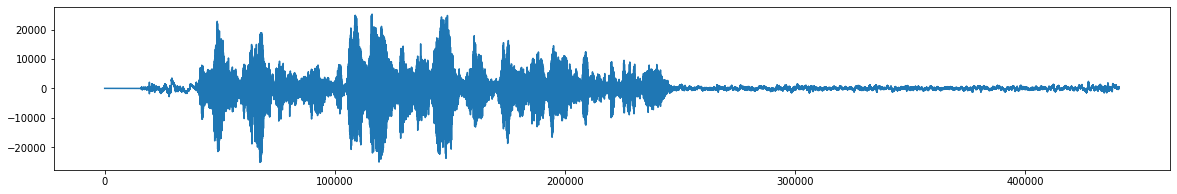

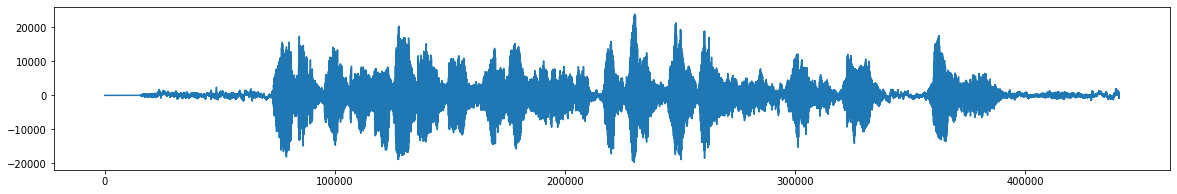

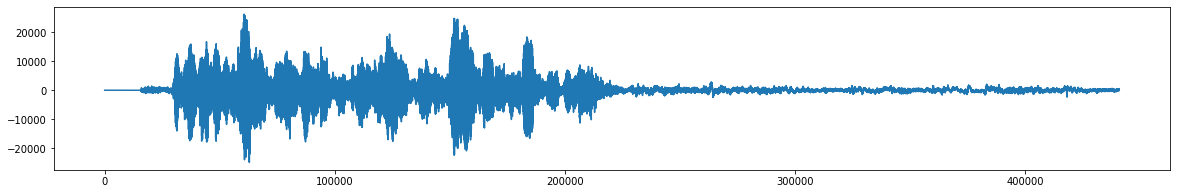

In [13]:
path0 = 'C:/Users/rojit/Desktop/database/voice/train_voice/'
path1 = 'C:/Users/rojit/Desktop/database/voice/model_values/'

file_paths = open('C:/Users/rojit/Desktop/database/voice/train_voice/training_set_addition.txt','r')

c = 0
features = np.asarray(())
for path in file_paths:
    path = path.strip() # removing leading and trailing spaces
    
    # plotting the audio file of samples
    ra, data = read(path0+path) 
    fig, ax = plt.subplots(figsize=(20,3))
    ax.plot(data)
    
    # extracting features from audio files
    vec = extract_features(data,ra)
    c += 1
    
    # stacking the features of 5 samples together as 1 numpy array
    if(np.size(features)==0):
        features = vec
    else:
        features = np.vstack((features, vec))
    
    if c == 5:
        # training individual speaker GaussuanMixture models
        gmm = GaussianMixture(n_components = 6, max_iter = 200, covariance_type='diag',n_init = 3)
        gmm.fit(features)
        
        print("Dimentions of features for"+" "+path.split("-")[0]+".gmm is",features.shape)
        
        # dumping the model for individual features into pickle file
        filename = path1+path.split("-")[0]+".gmm"
        pickle.dump(gmm, open(filename, 'wb'))
        c = 0
        features = np.asarray(())
file_paths.close()
    


[[-3.43700345 -2.06400811 -1.62463132 ... -0.09881254 -0.19754252
  -0.32738284]
 [-3.42425478 -1.73768598 -1.08998544 ...  0.04930201  0.01902819
   0.20901553]
 [-3.41967509 -1.80891188 -1.19362069 ...  0.21424132 -0.18795265
  -0.03425896]
 ...
 [ 0.02136285 -0.28393854  1.01018128 ...  0.4159076   0.21639514
  -0.07892566]
 [-0.03465289 -0.2120224   0.99563963 ... -0.23458789 -0.26616707
  -0.59543504]
 [-0.22040262 -0.11184597  1.07314772 ... -0.32261802 -0.63650724
  -1.40357219]]
(999, 20)
[-22.27870007 -18.3224286  -19.69832267]
Voice detected as that of:  Ranald
[[-4.31366856 -2.71816008 -1.85066073 ...  0.26380894 -0.65025112
  -0.80315533]
 [-4.29742033 -2.38638509 -1.42295247 ...  0.41338842 -0.39855547
  -0.33932859]
 [-4.29158349 -2.45880118 -1.50585904 ...  0.57995907 -0.6391059
  -0.54968944]
 ...
 [-0.8654871  -0.421309    0.03619457 ...  0.24381182 -0.26071659
  -0.29528833]
 [-0.83481691 -0.4965793   0.2051179  ...  0.04998705 -0.58644079
  -0.53337505]
 [-1.01593384

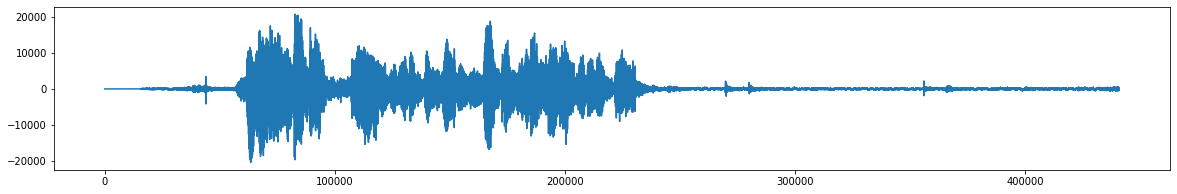

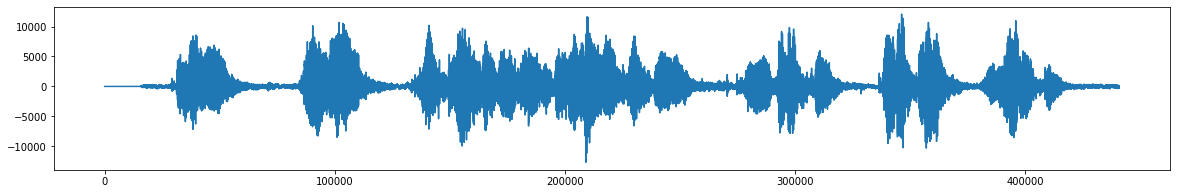

In [27]:
path0 = 'C:/Users/rojit/Desktop/database/voice/test_voice/'
path1 = 'C:/Users/rojit/Desktop/database/voice/model_values/'

file_paths = open('C:/Users/rojit/Desktop/database/voice/test_voice/testing_set_addition.txt','r')

gmm_files = os.listdir('C:/Users/rojit/Desktop/database/voice/model_values')


for name in gmm_files:
    model = []
    for f in gmm_files:
        model.append(pickle.load(open(path1+f,'rb')))

    speakers = [f.split('.')[0] for f in gmm_files]
    
for path in file_paths:
    path = path.strip()
    ra, data = read(path0+path) 
    fig, ax = plt.subplots(figsize=(20,3))
    ax.plot(data)
    
    vec = extract_features(data,ra)
    log_likelihood = np.zeros(len(model)) 
    
    for i in range(len(model)):
        gmm = model[i]  
        s = np.array(gmm.score(vec))
        log_likelihood[i] = s.sum()
    print(log_likelihood)     
    w = np.argmax(log_likelihood)
    print("Voice detected as that of: ", speakers[w])

    
    
    

